<a href="https://colab.research.google.com/github/Glasiermedic/Experiment-Capstone-Animal-Shelter/blob/master/Animal_Adoption_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Austin Animal Center Capstone Project


### About the Austin Animal Center

#### The center is located in Austion Texas.  It is one of the United States largest animal centers.  It currently serves about 16000 animals each year.  The center utilizes the help of foster homes, transfers and onsite adoptions to serve most animals possible.  They accept nearly all animals, have education programs.  
###Can we reduce the time spent in the shelter for the animals and increase the number of adoptions?   Reducing the time an animal spends in the shelter and increasing the number of adoptions is always the goal of Animal Shelters, those features are the two key metrics that are used to judge the success of a shelter.  To improve the duration of stay and the outcome there are several factors we need to consider.  The type of animal, age of animal, breed of the animal, health and its general appearance affect the outcome and how long it takes to reach that outcome.  

###As a part of designing the experiment I have examined the data for other patterns and correlations with the length of stay at the animal shelter.  



In [0]:
#@title
import numpy as np
import os

import pandas as pd
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

import seaborn as sns

### Importing the data from shelter

In [0]:
austin = pd.read_csv('https://raw.githubusercontent.com/Glasiermedic/Experiment-Capstone-Animal-Shelter/master/aac_intakes_outcomes_size_reduced.csv',encoding='utf-8')

### Looking at the variables/data collected about each animal 

In [24]:
austin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 34 columns):
age_upon_outcome              79672 non-null object
animal_id_outcome             79672 non-null object
date_of_birth                 79672 non-null object
outcome_subtype               36348 non-null object
outcome_type                  79662 non-null object
sex_upon_outcome              79671 non-null object
age_upon_outcome_(days)       79672 non-null int64
age_upon_outcome_(years)      79672 non-null float64
age_upon_outcome_age_group    79672 non-null object
outcome_datetime              79672 non-null object
outcome_month                 79672 non-null int64
outcome_year                  79672 non-null int64
outcome_weekday               79672 non-null object
outcome_hour                  79672 non-null int64
outcome_number                79672 non-null int64
age_upon_intake               79672 non-null object
animal_id_intake              79672 non-null object
animal_type

### Taking a random sample of 10% of the data provided by the shelter.

In [0]:
#@title
austin_sample = austin.sample(frac=.1, random_state=1)

In [0]:
#@title
#austin_sample.head(30)

### The types of animals entered into the system are:
####Cats, Dogs, Birds and "Other" animals

In [28]:
print("Types of animal reported by shelter: {}".format(austin_sample['animal_type'].unique()))


Types of animal reported by shelter: ['Other' 'Cat' 'Dog' 'Bird']


###What are the most prominent sexes of the animals upon leaving the shelter for each possible outcome?

####Spayed Females and Neutered Males are the most common for animals who are adopted.    

####Intact Males and Females are the most common for transfers

####Spayed Females and Neutered Males are the most common animals returned to their owners

#### Intact males and animals with unknown genders are the most common animals who are Euthanized

####Intact males and Females are the most common animals to die in the shelter

#### Animals with unkown sex are the most common to be "disposed"


(The code and results can be accessed in the box below)

In [0]:
#@title
outcomes =austin_sample['outcome_type'].value_counts().index.tolist()

for out in outcomes:
  print("Count of each sex for outcome: {} \n{}".format(out,austin_sample.loc
  [austin_sample["outcome_type"].isin([out]),'sex_upon_outcome'].value_counts()
  .head(5)))


####Investigating the instances where the sex was unknown and the animal was euthanized as the outcome:
####Most of those animals are classified as a cat or "other."

In [9]:
#@title

austin_sample.loc[austin_sample["sex_upon_outcome"
   ].isin(["Unknown"]),'animal_type'].value_counts()

Other    379
Cat      265
Bird      25
Dog       23
Name: animal_type, dtype: int64

### Most common ages for each category of animal outcomes

(The code and data representation can be accessed from the box below)

In [0]:
#@title
outcomes =austin_sample['outcome_type'].value_counts().index.tolist()
for out in outcomes:
  print("Top 5 most common ages for outcome: {} \n{}".format(out,austin_sample.loc
  [austin_sample["outcome_type"].isin([out]),
   'age_upon_outcome_(years)'].value_counts().head(3)))


####How many times are animals have been to the shelter for any reason. 

In [11]:
#@title
repeat =austin_sample['outcome_number'].value_counts().index.tolist()
print("Reported frequency of stays at the animal shelter: {}".format(repeat))

Reported frequency of stays at the animal shelter: [1, 2, 3, 4, 5, 6, 9, 8, 13]


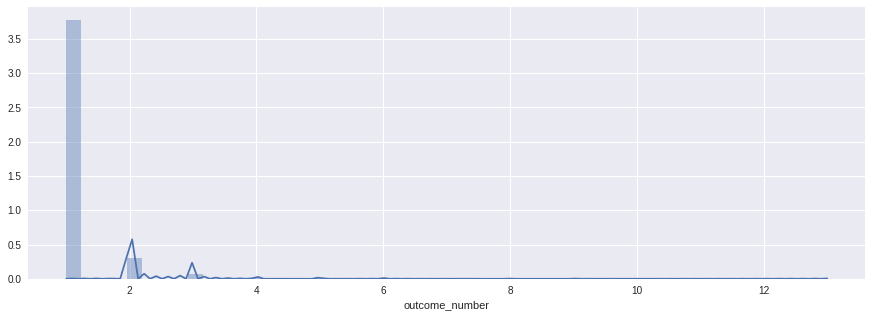

In [12]:
#@title
plt.figure(figsize=(15,5))
sns.distplot(austin_sample["outcome_number"])

plt.show()

###The distribution of intakes by hour of the day.  
#### First the bar graph of the data and then a clock representation of the data

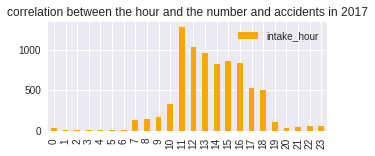

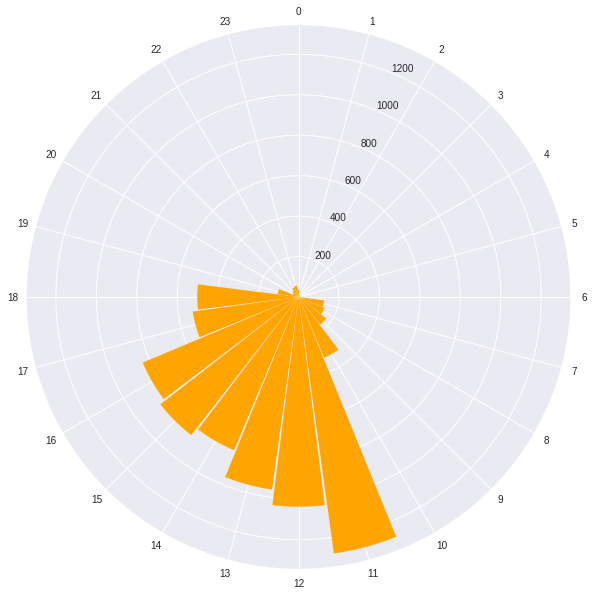

In [17]:
#@title
hour_sum = austin_sample['intake_hour'].value_counts()[:24].to_frame()
hour_sum.sort_index(inplace =True)

hour_sum.plot(kind='bar', color ='orange', title='correlation between the hour and the number of intakes', figsize=(5, 2), )
plt.show()

plt.figure(figsize=(10,10))

ax = plt.subplot(111, polar=True)
equals = np.linspace(0, 360, 24, endpoint=False) #np.arange(24)
ones =hour_sum['intake_hour']
ax.bar(np.deg2rad(equals), ones, color ='orange', width =.25)       

# Set the circumference labels
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels(range(24))      

# Make the labels go clockwise
ax.set_theta_direction(-1)       

# Place 0 at the top
ax.set_theta_offset(np.pi/2.0)       

plt.show()

In [0]:
#@title
#x = austin_sample['outcome_number'].value_counts().index.tolist()
#col = austin_sample['outcome_type'].value_counts().index.tolist()
#aust_result = pd.DataFrame(index=x, columns= col)

#aust_result



In [0]:
#@title
#austin_sample.loc[austin_sample["outcome_number"].isin(["1"]),'outcome_type'].isin(['Died']).value_counts()[1]

#for reps in aust_result.index:
  #for t in col:
     # aust_result.loc[reps,t] = \
     # austin_sample.loc[austin_sample["outcome_number"].isin([reps]),'outcome_type']\
     # .isin([t]).value_counts()[1]
      

In [0]:
#@title
aust_ani_out_days = austin_sample.groupby(['outcome_type', 'animal_type'])\
['time_in_shelter_days'].mean().unstack(fill_value=0)
aust_ani_int_days = austin_sample.groupby(['intake_type', 'animal_type'])\
['time_in_shelter_days'].mean().unstack(fill_value=0)
aust_ani_agg_days = austin_sample.groupby(['age_upon_intake_age_group', 'animal_type'])\
['time_in_shelter_days'].mean().unstack(fill_value=0)
aust_ani_sex_days = austin_sample.groupby(['sex_upon_outcome', 'animal_type'])\
['time_in_shelter_days'].mean().unstack(fill_value=0)


aust_ani_out_month = austin_sample.groupby(['outcome_type', 'animal_type'])\
['intake_month'].median().unstack(fill_value=0)
aust_ani_int_month = austin_sample.groupby(['intake_type', 'animal_type'])\
['intake_month'].median().unstack(fill_value=0)
aust_ani_agg_month = austin_sample.groupby(['age_upon_intake_age_group', 'animal_type'])\
['intake_month'].median().unstack(fill_value=0)
aust_ani_sex_month = austin_sample.groupby(['sex_upon_outcome', 'animal_type'])\
['intake_month'].median().unstack(fill_value=0)



#aust_ani_out_days
#aust_ani_int_days
#aust_ani_out_month
#aust_ani_int_month
#aust_ani_agg_days
#aust_ani_sex_days
#aust_ani_agg_month
#aust_ani_sex_month

###The Top ten breakdown of the age of animals upon coming to the shelter.
####ages represented in days

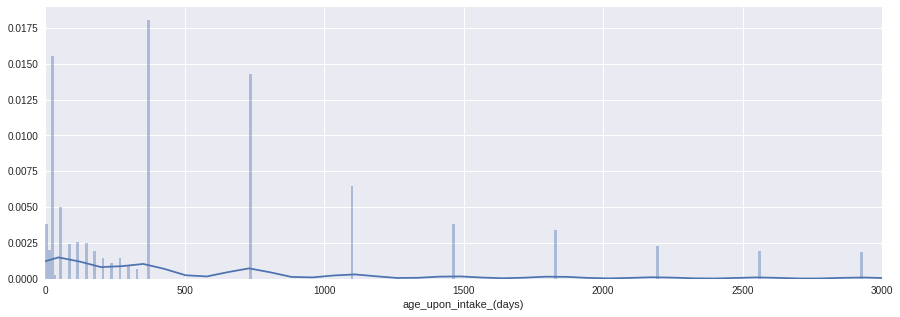

Top ten breakdown by Age upon intake in days: 
365     1464
730     1143
30       742
1095     560
60       363
1460     321
28       302
1825     283
21       259
150      191
Name: age_upon_intake_(days), dtype: int64 
%7.063962245205342 of entries


In [16]:
#@title
plt.figure(figsize=(15,5))
sns.distplot(austin["age_upon_intake_(days)"], bins=900)
plt.xlim(0,3000)
plt.LogLocator(2, [4.0])
plt.show()

auid =austin_sample['age_upon_intake_(days)'].value_counts().head(10)
print("Top ten breakdown by Age upon intake in days: \n{} \n%{} of entries".format(auid, ((auid.sum())/79672)*100))

##Correlations with our experiment
#### Another interesting pattern is the average length of stay for Cats and Dogs.  Adopted animals are staying a lot longer than all other outcomes.  Cats who turn up missing are staying a very long time.  Owner surrenders tend to spend more time at the clinic.  Cats and dogs stay longer at the clinic than other animals.  

#### Based on the average length of stay we can see that our focus on reducing the length of stay best serve Cats or  Dogs since they have the longer stays at the shelter.  

##Timing of experiment
#### These cross tabs show some important correlations for our experiment.  From May through August we have a higher number of animals coming to the shelter and leaving the shelter.  These months would be a good time to run our experiment.  We also see that those months have an even spread across the age ranges.  




###The relationship between Features
####In the Blue-yellow  scheme we are looking at how the length of stay is affected by two other features. 
####In the Blue-Purple scheme we are looking at how the most common month in relation to two other features. 

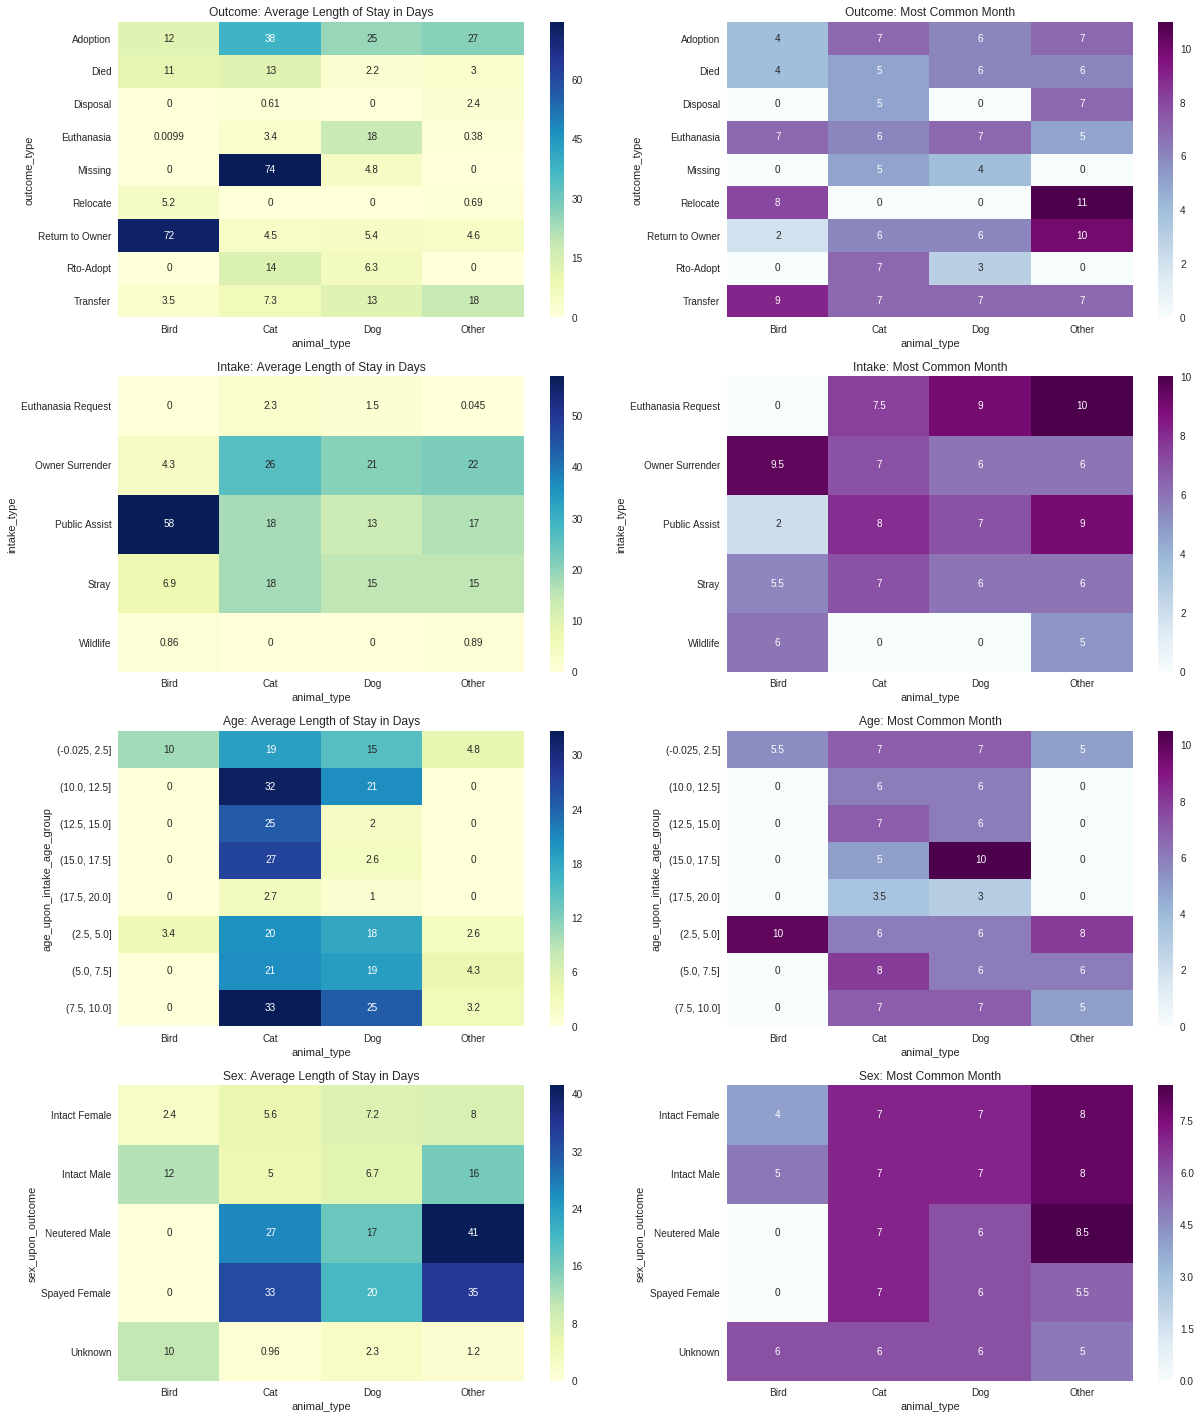

In [15]:
#@title
plt.figure(figsize=(20,25))

plt.subplot(4, 2, 1)

sns.heatmap(aust_ani_out_days, annot=True, cmap="YlGnBu")
#sns.heatmap(aust_ani_out_days, annot=True, linewidths=.8)
plt.yticks(rotation=0)
plt.xticks(rotation=0,)
plt.title('Outcome: Average Length of Stay in Days')

plt.subplot(4,2,3)
sns.heatmap(aust_ani_int_days, annot=True, cmap="YlGnBu")
#sns.heatmap(aust_ani_int_days, annot=True, linewidths=.8)
plt.yticks(rotation=0)
plt.xticks(rotation=0,)
plt.title('Intake: Average Length of Stay in Days')

plt.subplot(4,2,5)
sns.heatmap(aust_ani_agg_days, annot=True, cmap="YlGnBu")
#sns.heatmap(aust_ani_agg_days, annot=True, linewidths=.8)
plt.yticks(rotation=0)
plt.xticks(rotation=0,)
plt.title('Age: Average Length of Stay in Days')

plt.subplot(4,2,7)
sns.heatmap(aust_ani_sex_days, annot=True, cmap="YlGnBu")
#sns.heatmap(aust_ani_sex_days, annot=True, linewidths=.8)
plt.yticks(rotation=0)
plt.xticks(rotation=0,)
plt.title('Sex: Average Length of Stay in Days')


plt.subplot(4,2,2)
sns.heatmap(aust_ani_out_month, annot=True, cmap="BuPu")
#sns.heatmap(aust_ani_out_month, annot=True, linewidths=.8)
plt.yticks(rotation=0)
plt.xticks(rotation=0,)
plt.title('Outcome: Most Common Month')

plt.subplot(4,2,4)
sns.heatmap(aust_ani_int_month, annot=True, cmap="BuPu")
#sns.heatmap(aust_ani_int_month, annot=True, linewidths=.8)
plt.yticks(rotation=0)
plt.xticks(rotation=0,)
plt.title('Intake: Most Common Month')

plt.subplot(4,2,6)
sns.heatmap(aust_ani_agg_month, annot=True, cmap="BuPu")
#sns.heatmap(aust_ani_agg_month, annot=True, linewidths=.8)
plt.yticks(rotation=0)
plt.xticks(rotation=0,)
plt.title('Age: Most Common Month')

plt.subplot(4,2,8)
sns.heatmap(aust_ani_sex_month, annot=True, cmap="BuPu")
#sns.heatmap(aust_ani_sex_month, annot=True, linewidths=.8)
plt.yticks(rotation=0)
plt.xticks(rotation=0,)
plt.title('Sex: Most Common Month')

plt.show()

##The Problem
####With funding and available space Animal Shelters like Austin Animal Center are faced with developing plans to reduce the length of stay of the animals.  Austin Animal Center already utilizes a nation wide transfer program along with community foster care options.  They are still faced with having to turn away or euthanize animals.  To be able to service the maximum number of animals each year the optimum solution, one that aligns with their mission statement would be to increase the adoption rate and transfer acceptance.

##The Potential Solution

#### I am proposing that the center reduce the length of stay of the shelter animals through the use of improved photographs of each animal brought to the shelter.  Based on my own experience photographing shelter animals and through my research of methods used by other shelters to improve their outcomes and time in shelters I believe that changing the photographs of the animals will make positive changes for Austin Animal Center. (see resources)

##The Method

#### To test the effectiveness of this campaign we will create a control group and a test group.   Based on the previous data the center has collected I am proposing the population we focus on is dogs brought into the shelter and have been there for six days or longer.  We need to exclude all animals that have been there less than six days because the average length of stay for owner return, owner re-adoption and in shelter deaths is 5.4%, 6.3% and 2.2% respectively.  While their inclusion would most likely have a minimal effect on our results it does reduce the waste of resources for the shelter.  


####  Our photographers(3 professional) will be enlisted from the local photography club as volunteers.  We will randomly select dogs 30% of the dogs for each of the three months to be in the control group and 30% to be in the test group.  Prior to the start of the experiment we will test our random selection process to ensure that we are getting appropriate t-test results and p-values.  We also will compare these t-tests and p-values to the actual groups selected for the experiemt to ensure we have selected good representations of the population. The control group will have their photos taken following the current practices of the center and the staff will be instructed not to change a thing about how they take the photos.  The test group will have their photographs taken by the photography club volunteer using two predetermined backdrops and a site outside that has been predetermined.  The photos from both the control group and the test group will be posted onto the center's website and any other location the photos are utilized.  During the experiment all data that is currently collected will continue to be collected and the staff will also record whether the photo of the animal has a positive, negative, or neutral impact on their decision.  The key metric we will be measuring is the length of stay but we will also look at how they rated the impact of the photograph(s) of the animal, the age, breed, coloring and health of the animal along with the name of the photographer that took the photos.   

#### If the results of the test are non conclusive we will continue the experiment until September.  

#### If the results are conclusive and positive, then we will develop a plan to impliment the improved photography program for all animals.  We consider a positive result a reduction in the average length of stay by greater than 33% for all animals that have not died or been returned to their owner in some way.  

## Summation

#### I am proposing that we change how the animals are photographed to reduce the length of stay of the aniamls.  I am chosing to focus our research on dogs and to do the experiment in the summer months.  We will utilize a randomized selection process to create a control group and a test group.  The test group will be photographed by professional photographers while the control group will get the standard center photographs taken. We will determine success by examining the data collected for various trends 

##Resources:

https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/home

https://petapixel.com/2017/09/05/animal-shelters-need-good-photographers/
